Accuracy: 0.96

Classification Report:


,precision,recall,f1-score,support
0,0.98,0.91,0.94,43.00
1,0.95,0.99,0.97,71.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.95,0.95,114.00
weighted avg,0.96,0.96,0.96,114.00


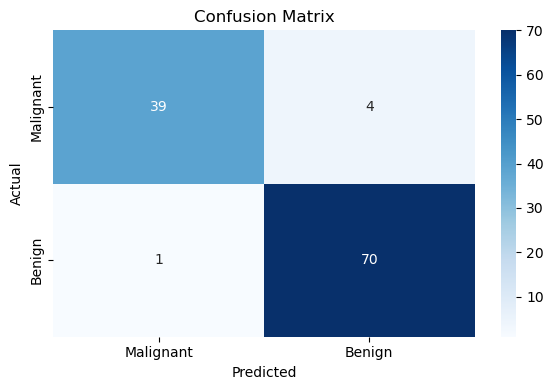

In [12]:
# Linear Classification with Logistic Regression

# 1. Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 2. Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 3. Replace numeric labels with class names for clarity
target_names = ['Malignant', 'Benign']
y_named = pd.Series(y).map({0: 'Malignant', 1: 'Benign'})

# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
display(report_df.round(2))

# 7. Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
